<a href="https://colab.research.google.com/github/sauravkumar19/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HEALTH INSURANCE CROSS SELL PREDICTION**
A project to predict how effective vehicle insurance will be for the customers of health insurance of the company.

##Problem Statement

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

## Attribute Information

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested in vehicle insurance policy, 0 : Customer is not interested in vehicle insurance policy

##Reading Data And Importing Libraries Required For Analysis


**We are using the following libraries for analysis:**
- Numpy: We will use numpy arrays as they are comparitively faster than lists, also columns of dataframes behaves as numpy arrays

- Pandas: for reading the data from csv file, for data cleaning and for preparing data for analysis

- matplotlib,seaborn: for different visualisations, for drawing conclusions from data and for exploratory data analysis. 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Download datasets 
from google.colab import drive
drive.mount('/content/drive')
import os
path="/content/drive/My Drive/AlmaBetter_Capstone_projects/capstone_project3/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv"
insurance_original=pd.read_csv(path,parse_dates=[2,3])
insurance= insurance_original.copy()

Mounted at /content/drive


##Data Cleaning And Description
Describing the data and understanding the distribution of the columns.

Cleaning the data,removing null values if present and removing duplicates and outliers.

###Data Description

In [ ]:
#getting an idea about what type of data each column have, by having a look at top 5 rows of data
insurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


From above we note that:
- in gender we have to do encoding, for male and female
- in vehical age we have to check the number of categories and then we will try to do ordinal encoding
Also we will check the number of unique values in each column and then work accordingly.
- Also we note that we have

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  object 
 3   Driving_License       381109 non-null  object 
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 34.9+ MB


- there is no null value in the data
- but we note that some columns are of object type so we will convert it to int to ensure that there is no garbage value

In [ ]:
insurance.describe()

,id,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
insurance.describe(include="object")


,Gender,Age,Driving_License,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109,381109,381109
unique,2,66,2,3,2
top,Male,24,1,1-2 Year,Yes
freq,206089,25960,380297,200316,192413


###Data Cleaning

In [ ]:
#now we note that all the features in our data are numerical
continuous_features=["Annual_Premium","Vintage",'Age']
categorical_features=[ 'Gender', 'Driving_License', 'Region_Code','Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response']

In [ ]:
#shape of data we have before data cleaning
insurance.shape

(381109, 12)

In [ ]:
insurance.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
def print_null_percent(df):
  null_percent=pd.Series()
  for col in df.columns:
    null_percent[col]=((df.shape[0]-df[col].count())/(df.shape[0]))*100
  print("columns with null values\n",null_percent[null_percent!=0])


In [ ]:
"""
presently data do not have any null value but it may be introduced later
"""
def cleaning(df,continuous_col=[],discrete_col=[],print_null=True,th=20.0):
  """
  this function removes all the null values from the data 
  """

  print(f"before cleaning\n")
  print(f"shape of data: {df.shape}")
  if(print_null):
    print_null_percent(df)
  
  #step1
  #preserving columns having at least 20% of not null values
  df.dropna(axis=1,inplace=True,thresh=((th/100.0)*df.shape[0]))
  #preserving rows having at least 20% of not null values
  df.dropna(axis=0,inplace=True,thresh=((th/100.0)*df.shape[1]))

  #step2
  df.drop_duplicates(inplace=True,ignore_index=True)
  

  #step3
  #removing all the null values
  for c1 in df.columns:

    #i.e it is an non catagorical column
    if c1 in continuous_col: 
      df[c1].fillna(df[c1].mean(),inplace=True)
    else:
      df[c1].fillna(df[c1].value_counts().idxmax(),inplace=True)

  print(f"\n\nAfter cleaning the data\n")
  print(f"shape of data: {df.shape}")
  print_null_percent(df)
  return df

In [ ]:
insurance=cleaning(insurance,continuous_features,categorical_features,th=20)

before cleaning

shape of data: (381109, 12)
columns with null values
 Series([], dtype: float64)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  




After cleaning the data

shape of data: (381109, 12)
columns with null values
 Series([], dtype: float64)


In [ ]:
def remove_outliers2(df,continuous_col=[]):

  if len(continuous_col)==0:

   continuous_col=df.describe().columns
  df[continuous_col].boxplot(rot=90)
  plt.title("before removing outliers",)
  plt.show()
  
  for c in continuous_col:
    df.index=np.arange(0,df.shape[0])
    Q1=np.quantile(df[c],0.25)
    Q3=np.quantile(df[c],0.75)
    IQR= Q3 - Q1
    upper=np.where(df[c]>=(Q3+1.5*IQR))[0]
    #print(upper[0])
    lower=np.where(df[c]<=(Q1-1.5*IQR))[0]   #it will be a tuple and we require a numpy array which is at it's first index.
    #print(lower)
    outliers_idx=np.unique(np.append(upper,lower)) 
    df.drop(outliers_idx, inplace = True) 
    
    #df.loc[upper][c]=Q3
    #df.loc[lower][c]=Q1
     
  df[continuous_col].boxplot(rot=90)
  plt.title("after removing outliers",)
  plt.show()
  return df

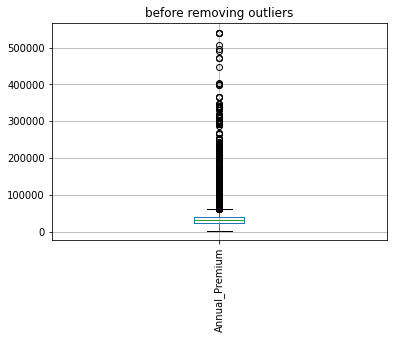

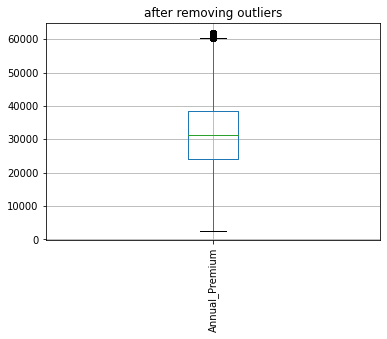

In [ ]:
insurance = remove_outliers2(insurance,["Annual_Premium"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


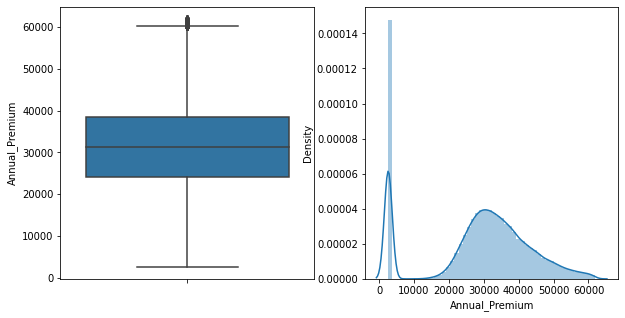

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
fig = sns.boxplot(y = insurance['Annual_Premium'])

plt.subplot(1,2,2)
fig = sns.distplot(insurance['Annual_Premium'])
plt.show()

In [ ]:
#shape of data we have after data cleaning
insurance.shape

(370789, 12)

##Feature Engineering

###Some Basic Requirements
Here we have set some default values before doing feature engineering, so that we can use them in further process if required.

In [ ]:
column_drop=[]  #here we will append all the columns one-by-one which are needed to drop so drop function needs not to be executed again and again

In [ ]:
insurance.shape  #shape of data before before feature engineering

(370789, 12)

In [ ]:
insurance.columns  #columns before doing feature engineering

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
#now we note that all the features in our data are numerical
continuous_features=["Annual_Premium","Vintage",'Age']
categorical_features=[ 'Gender', 'Driving_License', 'Region_Code','Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response']

Here we have written a function called percentage response, as we observe that we further require to do this same steps more than once

In [ ]:
def percentage_response(df,indep_col,dep_col,sort=1):
  """
  This function will take:
  df: a pandas dataframe
  indep_col: string- an independent column of df
  dep_col: string- an dependent column of df
  sort: by which column of response variable in crosstab you want to sort the data
  Both of these attributes must be categorical, else the this function will work but there is no significance of result

  working:
  using crosstab we calculated how different value of categorical variable depends on each other.
  It than calculates the percentage of contribution of each value independent variable to each different value categorical variable
  and then return that percentage dataframe in a sorted order by the column named 1 by default
  """
  
  col_response=pd.crosstab(df[indep_col],df[dep_col])
  col_response_percentage=col_response.copy()
  total = col_response[0]+col_response[1]
  col_response_percentage[0] = round((col_response[0]/total)*100,2)
  col_response_percentage[1] = round((col_response[1]/total)*100,2)
  col_response_percentage.sort_values(by=sort,inplace=True,ascending=False)
  return col_response_percentage
    


###Encoding Categorical Variables
As machiene learning models do not understand object type data so doing encoding of the columns having object values

In [ ]:
#changing gender and vehical damage to 0,1:
"""
in gender
0- male
1- female

in Vehical_Damage
0- no
1- yes

"""

'\nin gender\n0- male\n1- female\n\nin Vehical_Damage\n0- no\n1- yes\n\n'

In [ ]:
gender_dict={"Male":0,"Female":1}
for c in insurance["Gender"].unique():
  insurance["Gender"][insurance["Gender"]==c]=gender_dict[c]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
damage_dict={"Yes":1,"No":0}
for c in insurance["Vehicle_Damage"].unique():
  insurance["Vehicle_Damage"][insurance["Vehicle_Damage"]==c]=damage_dict[c]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#now changing vehical age, so checking the  different categories it is having
insurance["Vehicle_Age"].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

from above we note that vehical age is categorized into three types:
0- age is less than 1 year
1- age is between 1-2 years
2- age is greater than 2 years

so for this feature we will do ordinal encoding 

In [ ]:
age_dict={"< 1 Year":0,"1-2 Year":1,"> 2 Years":2}

In [ ]:
insurance["Vehicle_Age"]=insurance["Vehicle_Age"].replace(age_dict)

In [ ]:
#now all the columns in data are integer columns so changing their dtype
#another reason for doing so is to check whether our data have any garbage value or not.
for c in insurance.columns:
  insurance[c]=pd.to_numeric(insurance[c])

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370789 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    370789 non-null  int64  
 1   Gender                370789 non-null  int64  
 2   Age                   370789 non-null  int64  
 3   Driving_License       370789 non-null  int64  
 4   Region_Code           370789 non-null  float64
 5   Previously_Insured    370789 non-null  int64  
 6   Vehicle_Age           370789 non-null  int64  
 7   Vehicle_Damage        370789 non-null  int64  
 8   Annual_Premium        370789 non-null  float64
 9   Policy_Sales_Channel  370789 non-null  float64
 10  Vintage               370789 non-null  int64  
 11  Response              370789 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 36.8 MB


###Feature Engineering on Categorical Data

####Basic Information

In [ ]:
#counting the number of unique values in each feature
for c in categorical_features:
  print(f"number of unique values in column {c}: {(insurance[c].unique()).size}")

number of unique values in column Gender: 2
number of unique values in column Driving_License: 2
number of unique values in column Region_Code: 53
number of unique values in column Previously_Insured: 2
number of unique values in column Vehicle_Age: 3
number of unique values in column Vehicle_Damage: 2
number of unique values in column Policy_Sales_Channel: 155
number of unique values in column Response: 2


- **id**: the column id is of no use as it is just showing the id of a customer 
which is unique for every row, so it does'nt effect our result
- Gender: no feature engineering required
- **Region Code**: In this we have to observe some important points to check how this feature is useful.
- Previously_Insured: no feature engineering required
- Vehical_Age: no feature engineering required
- Vehical_Damage: no feature engineering requiredd
- **Policy_sales_channels**: There are total 155 policy sales channels, let's check if there is any particular order or we have to perform some feature engineering
- response: no feature engineering required

In [ ]:
column_drop.append("id")

In [ ]:
#value_counts for categorical features

for c in categorical_features:
  print(f"for column {c}:\n{insurance[c].value_counts()}","\n")

for column Gender:
0    200319
1    170470
Name: Gender, dtype: int64 

for column Driving_License:
1    370026
0       763
Name: Driving_License, dtype: int64 

for column Region_Code:
28.0    99741
8.0     32069
46.0    19628
41.0    17941
15.0    13178
30.0    12179
29.0    10871
50.0    10188
3.0      9172
11.0     9116
36.0     8700
33.0     7613
47.0     7418
35.0     6883
6.0      6273
45.0     5571
37.0     5483
18.0     5115
48.0     4681
14.0     4647
39.0     4558
10.0     4364
21.0     4257
2.0      4038
13.0     4029
12.0     3188
7.0      3168
9.0      3094
27.0     2816
32.0     2786
43.0     2616
26.0     2584
17.0     2535
25.0     2491
24.0     2408
0.0      2019
38.0     2006
16.0     2006
31.0     1960
23.0     1958
20.0     1934
49.0     1824
4.0      1796
34.0     1656
19.0     1534
22.0     1298
40.0     1285
5.0      1275
1.0      1008
44.0      805
42.0      590
52.0      262
51.0      174
Name: Region_Code, dtype: int64 

for column Previously_Insured:
0    20

####Feature Engineering on Region_Code column

In [ ]:
insurance["Region_Code"].value_counts()  #here no region code have very less value, so we cannot include others here 
#we note that there is not much variation in value for different region codes, also there is no particular order of region code

28.0    99741
8.0     32069
46.0    19628
41.0    17941
15.0    13178
30.0    12179
29.0    10871
50.0    10188
3.0      9172
11.0     9116
36.0     8700
33.0     7613
47.0     7418
35.0     6883
6.0      6273
45.0     5571
37.0     5483
18.0     5115
48.0     4681
14.0     4647
39.0     4558
10.0     4364
21.0     4257
2.0      4038
13.0     4029
12.0     3188
7.0      3168
9.0      3094
27.0     2816
32.0     2786
43.0     2616
26.0     2584
17.0     2535
25.0     2491
24.0     2408
0.0      2019
38.0     2006
16.0     2006
31.0     1960
23.0     1958
20.0     1934
49.0     1824
4.0      1796
34.0     1656
19.0     1534
22.0     1298
40.0     1285
5.0      1275
1.0      1008
44.0      805
42.0      590
52.0      262
51.0      174
Name: Region_Code, dtype: int64

In [ ]:
region_response_percentage=percentage_response(insurance,"Region_Code","Response")


In [ ]:
region_Response_dict=dict(region_response_percentage[1])
insurance["Region_Response"]=insurance["Region_Code"].replace(region_Response_dict)


In [ ]:
#adding the column in the respective lists
column_drop.append("Region_Code")
continuous_features.append("Region_Response")
categorical_features.remove("Region_Code")

####policy Sales Channel

From value counts we observe that there is no particular trend in the column, also some of the channels have very less contribution

In [ ]:
#from above in policy sales channel we note that at last channels are very less active.

channels=insurance["Policy_Sales_Channel"].value_counts()
lesser_insurance=channels.index[channels.values<100]

#these all indexes have less than 100 contribution which is very less as compared to higher contributions as observed from above so let's consider
#these all as one channel with index  0.0

to_0=[True if c in lesser_insurance else False for c in insurance["Policy_Sales_Channel"] ]
insurance["Policy_Sales_Channel"][to_0]=0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
insurance["Policy_Sales_Channel"].value_counts()

152.0    132168
26.0      76375
124.0     71902
160.0     21489
156.0     10591
          ...  
127.0       105
113.0       104
119.0       101
135.0       101
54.0        100
Name: Policy_Sales_Channel, Length: 63, dtype: int64

Now we have added a new column named Channel Response which shows the percentage of customers for a given policy channel who takes vehical insurance, as there are so many policy channels and there is no particular order so after adding this useful column we will drop policy channel column

In [ ]:
channel_response_percentage=percentage_response(insurance,"Policy_Sales_Channel","Response")

In [ ]:
Channel_Response_dict=dict(channel_response_percentage[1])
insurance["Channel_Response"]=insurance["Policy_Sales_Channel"].replace(Channel_Response_dict)
column_drop.append("Policy_Sales_Channel")
continuous_features.append("Channel_Response")
categorical_features.remove("Policy_Sales_Channel")

###Feature Engineering on Continuous Attributes

####Basic Understanding

In [ ]:
continuous_features

['Annual_Premium', 'Vintage', 'Age', 'Region_Response', 'Channel_Response']

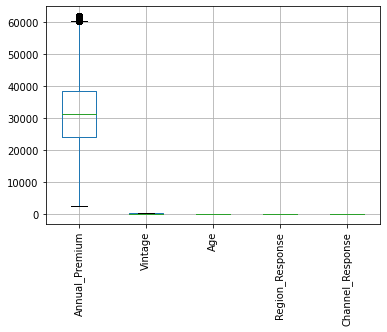

In [ ]:
insurance[continuous_features].boxplot(rot=90)   #here we note that we do not have any outlier in our data

In [ ]:
for c in continuous_features:
  print(f"number of unique values in column {c}: {(insurance[c].unique()).size}")

number of unique values in column Annual_Premium: 41667
number of unique values in column Vintage: 290
number of unique values in column Age: 66
number of unique values in column Region_Response: 51
number of unique values in column Channel_Response: 62


- Annual_Premium: We tried to normalize this column but after normalzation the model roc_auc score get reduced so be kept it unchanged
- vintage: observe if there is any correlation with response or not
- Age: observe if there is any correlation with response or not, if we are able to note some trend then we will divide ages in some categories and make age a categorical column.
- We will do nothing with Region_Responses and Channel_Responses as we have added them using feature engineering and there is no need to make any changes

####Normalising Annual_Premium

In [ ]:
def normalization(df,col_list):

  for c1 in col_list:
    try:
      mx=df.max()[c1]
      mn=df.min()[c1]
      df[f"{c1}_Normalized"]=(df[c1]-mn)/(mx-mn)
      col_list.remove(c1)    #so that c1 do  not get normalized again and again
    except:
      print(f"{c1} is not a numerical column, so it can not be normalized")
      col_list.remove(c1)
      normalization(df,col_list)
  return df

In [ ]:
#insurance=normalization(insurance,["Annual_Premium"])   # we observed that our model's is working better with not normalized values, so we leave this step

####Vintage

In [ ]:
insurance["Vintage"].value_counts()
#vintage column is not showing very much variation there are all categories of people, those who are old customers to those who have recently joined.

256    1382
73     1375
282    1361
126    1355
158    1354
       ... 
224    1204
89     1201
205    1198
32     1194
277    1179
Name: Vintage, Length: 290, dtype: int64

In [ ]:
percentage_response(insurance,"Vintage","Response")
#here we note that vintage does not very much affect the percentage or probabililty of person's response so we will drop this column


Response,0,1
Vintage,,
220,85.44,14.56
212,85.63,14.37
164,85.70,14.30
189,85.78,14.22
11,85.86,14.14
...,...,...
78,89.66,10.34
156,89.68,10.32
273,89.72,10.28


In [ ]:
column_drop.append("Vintage")
continuous_features.remove("Vintage")

####Age 

In [ ]:
insurance[["Age"]].agg(["min","max"])

,Age
min,20
max,85


here we note that the minimum age of a customer is 20 and the maximum age is 85

In [ ]:
insurance["Age"].value_counts()

24    25400
23    23810
22    20572
25    20159
21    16161
      ...  
81       53
82       28
83       21
84       11
85       10
Name: Age, Length: 66, dtype: int64

In [ ]:
pd.crosstab(insurance["Age"],insurance["Response"])

Response,0,1
Age,,
20,5979,171
21,15599,562
22,19824,748
23,22935,875
24,24501,899
...,...,...
81,49,4
82,27,1
83,20,1


let's try dividing age in three categories
below 40- 0
40-60- 1
60above- 2

In [ ]:
insurance["Age_Section"]=insurance["Age"].copy()

In [ ]:
insurance["Age_Section"][insurance["Age"]<=40]=0
insurance["Age_Section"][(insurance["Age"]>40)&(insurance["Age"]<=60)]=1
insurance["Age_Section"][insurance["Age"]>60]=2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
Age_wise_response = pd.crosstab(insurance["Age_Section"],insurance["Response"],margins=True)
Age_wise_response

Response,0,1,All
Age_Section,,,
0,193825,18390,212215
1,94630,22851,117481
2,37179,3914,41093
All,325634,45155,370789


([<matplotlib.axis.XTick at 0x7f9e948c9210>,
 [Text(0, 0, '20-40'),
  Text(0, 0, '40-60'),
  Text(0, 0, '60-above'),
  Text(0, 0, 'All')])

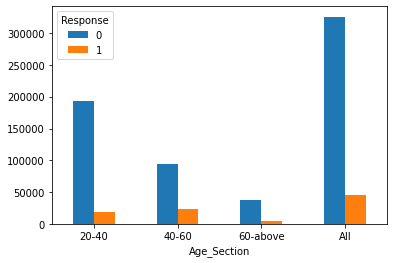

In [ ]:
Age_wise_response.plot(kind = 'bar', y = [0,1])
loc, label = plt.xticks()
new_ticks = ['20-40','40-60','60-above','All']
plt.xticks(loc,new_ticks, rotation=0)

In [ ]:
Age_wise_response.index

Index([0, 1, 2, 'All'], dtype='object', name='Age_Section')

From here we note that most of the peoples are from 20-40 age group, also the people from age group 2 that is 40-60 are the peoples having the highest number of positive responses, so this means that if a person belongs to this age category than he will more prefer the vehical insurance, so this classification of age is working good for us, so we will keep column age_section and drop age column

In [ ]:
percentage_response(insurance,"Age_Section","Response")

Response,0,1
Age_Section,,
1,80.55,19.45
2,90.48,9.52
0,91.33,8.67


In [ ]:
column_drop.append("Age")
continuous_features.remove("Age")
categorical_features.append("Age_Section")

###Target Column
If we found that the target column is biased so we have performed oversampling using smote and added some rows with the minority class as 1

In [ ]:
insurance["Response"].value_counts()         #our target column is biased

0    325634
1     45155
Name: Response, dtype: int64

Text(0.5, 1.0, 'Before using SMOTE')

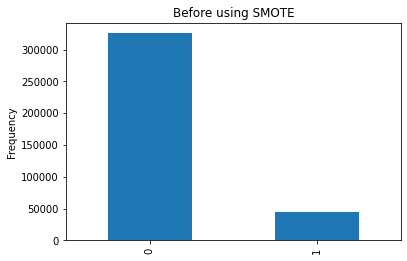

In [ ]:
insurance["Response"].value_counts().plot(kind = 'bar')
plt.ylabel('Frequency', fontsize = 10)
plt.title('Before using SMOTE')

In [ ]:
45155/(325634+45155)    #we have only 12% entries for positive response, so our model will not be able to get trends

0.12178085110399715

####Over sampling using smote of target column

In [ ]:
insurance["Response"].value_counts()   
#here the ratio is very less if i take number of positive response to be 250000 that this ratio will be improved

0    325634
1     45155
Name: Response, dtype: int64

In [ ]:
30000/(30000+325634)  # this ratio is not bad.

0.08435638887170518

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
smote=BorderlineSMOTE(sampling_strategy={0:325634,1:300000})
x=insurance.loc[:, insurance.columns != 'Response']
y=insurance["Response"]
x_smote, y_smote = smote.fit_resample(x, y)

In [ ]:
insurance.drop(list(insurance.columns),axis=1,inplace=True)

In [ ]:
insurance=x_smote
insurance["Response"]=y_smote

In [ ]:
insurance.shape

(625634, 15)

In [ ]:
insurance["Response"].value_counts()

0    325634
1    300000
Name: Response, dtype: int64

Text(0.5, 1.0, 'After using SMOTE')

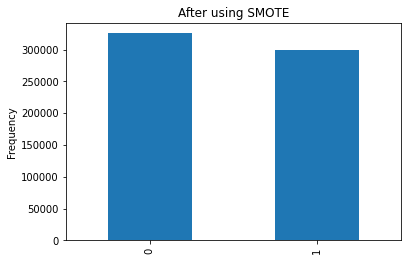

In [ ]:
insurance["Response"].value_counts().plot(kind = 'bar')
plt.ylabel('Frequency', fontsize = 10)
plt.title('After using SMOTE')

###Final Information:
Finally we reached at the end of feature engineering, let's drop the column which we have decided to drop and have a look at the data we have after feature engineering

In [ ]:
column_drop  #columns we are droping

['id', 'Region_Code', 'Policy_Sales_Channel', 'Vintage', 'Age']

In [ ]:
insurance.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Region_Response',
       'Channel_Response', 'Age_Section', 'Response'],
      dtype='object')

In [ ]:
insurance.shape

(625634, 15)

In [ ]:
insurance.drop(column_drop,axis=1,inplace=True)

In [ ]:
insurance.columns

Index(['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Region_Response',
       'Channel_Response', 'Age_Section', 'Response'],
      dtype='object')

In [ ]:
insurance.shape

(625634, 10)

In [ ]:
categorical_features

['Gender',
 'Driving_License',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Response',
 'Age_Section']

In [ ]:
continuous_features

['Annual_Premium', 'Region_Response', 'Channel_Response']

##EDA: Exploratory Data Analysis

Let's now do some exploratory analysis on our to draw some conclusion, important for real world and for our model as well.

###Univariate Analysis
here we will analyse the distribution of continuous columns,
and visualize the distribution of our categorrical columns through pie chart

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e94d6b4d0>,
      dtype=object)

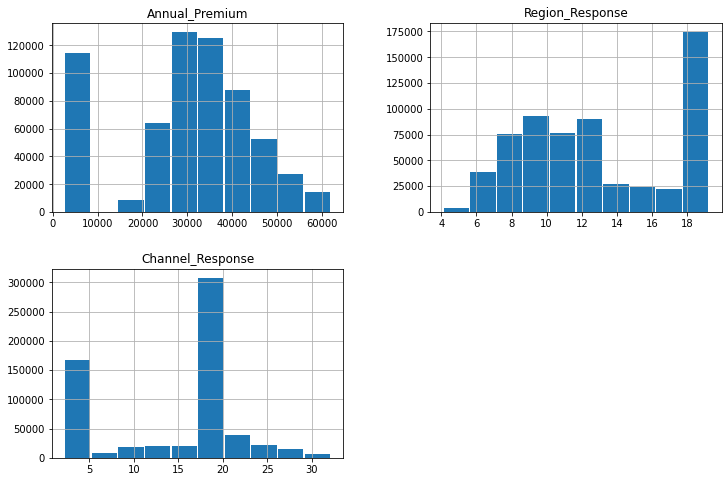

In [ ]:
insurance[continuous_features].hist(figsize=(12,8), rwidth=0.95)


- From above we note that there are very less number of companies that have very high annual premium
- In channel response either the percentage of response is mainly between 0-5 or between 15-20



In [ ]:
#for  categorical columns we analyzed the distribution using pie plot
def make_pieplot(data,y_axis,title = None):
  '''
  input
  data: Pandas series for pie plotting
  y_axis: column of pandas dataframe
  title: String value for plot title

  output 
  Display a pie chart  
  '''
  explode_list = data.value_counts().tolist()
  explode_ = [0 if elem != max(explode_list) else 0.01 for elem in explode_list]
  dict_data=data.value_counts()
  dict_data.plot(kind = 'pie', y = y_axis, autopct='%1.2f%%', figsize =(15,10),explode = explode_, fontsize = 10,legend=True,rot=45)
  #plt.legend(title ='market_segment',loc ='lower right')
  plt.title(title,bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
  plt.show()

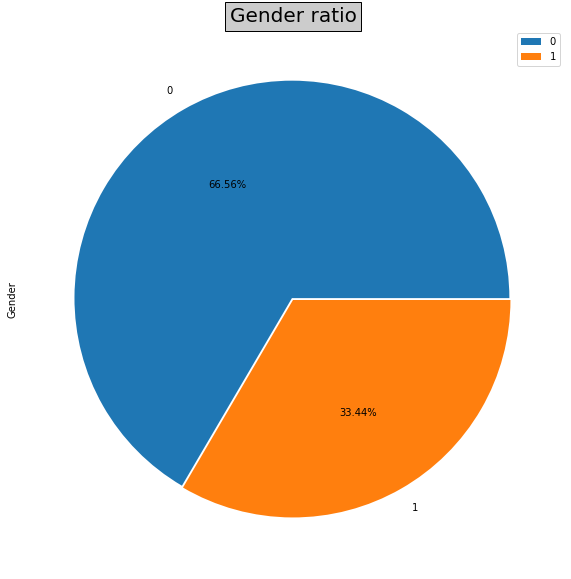

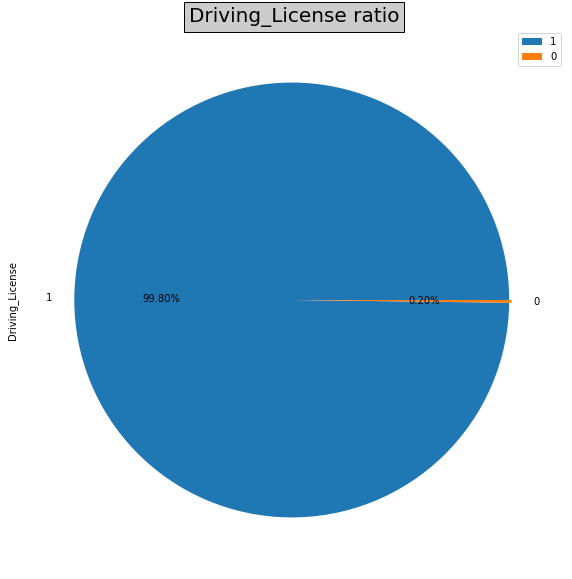

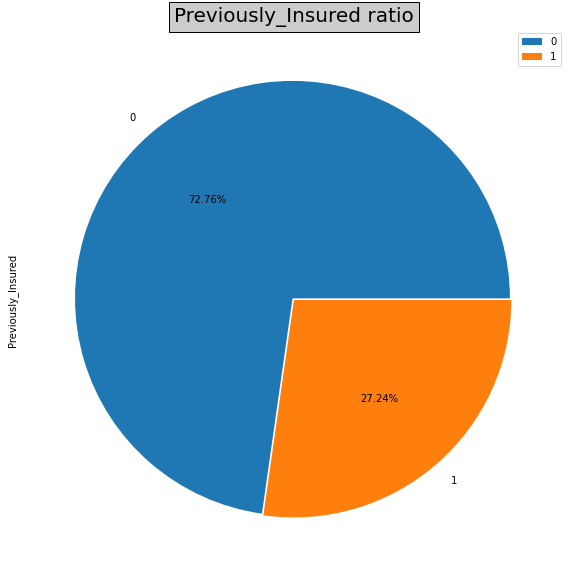

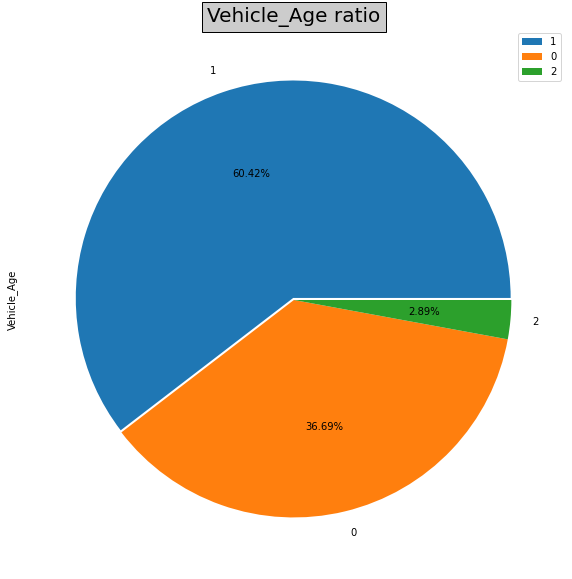

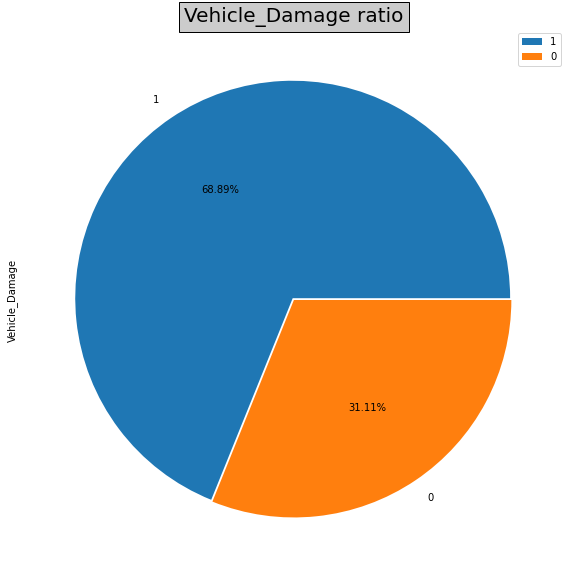

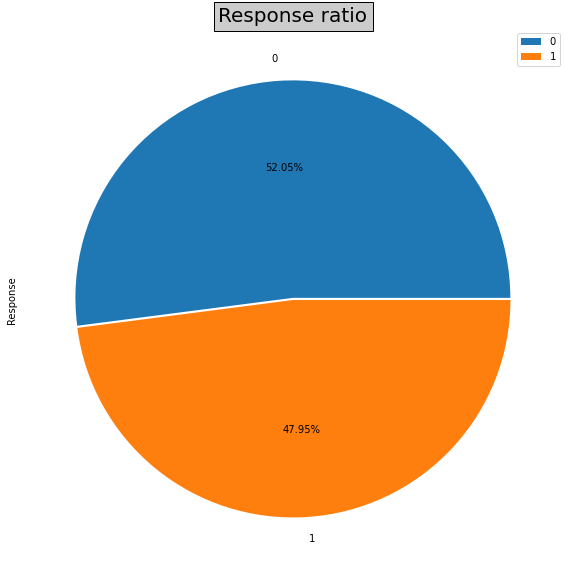

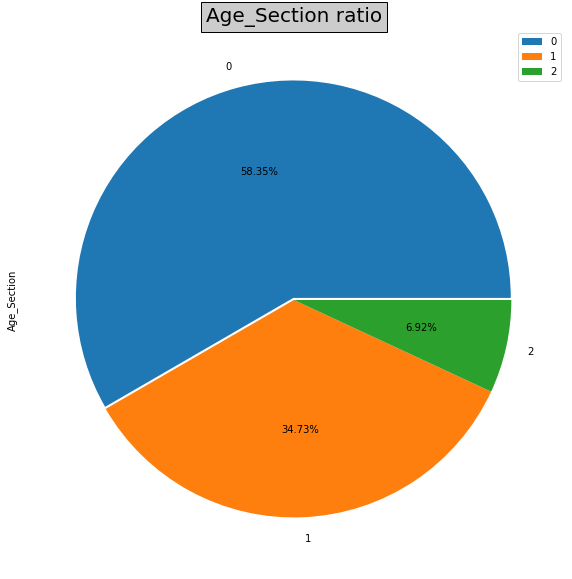

In [ ]:
for c in categorical_features:
  make_pieplot(insurance[c],c,f"{c} ratio")

here we note that:
- More than 65% of the customers are male, so we must work for making females more aware about insurance policy
- 99.80% of the customers are having driving license, and there are very less peoples not a license
- there are only 27.24% of people who have insured previously.
- Most of the vehicles have age of 1-2 years.
- Approximately 70% of the vehicles are previously damaged.
- there are comaparitively lesser number of peoples belonging to age group 60-80, that is young peoples are more aware about the health insurance policies

###Bivariate Analysis
We one by one compare our categorical and continuous columns with our dependent variable that is response.

Finding relation between our target feature and categorical features using cross tab

Here we have drawn barplots to look which category of our categorical feature is leading to more reponses

In [ ]:
categorical_features

['Gender',
 'Driving_License',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Response',
 'Age_Section']

In [ ]:
def plot_bar(df,f1,distribution,per_response_1):
  uq=len(df[f1].unique())
  distribution_graph = distribution.plot(kind = 'bar', figsize =(10,6))
  plt.title(f'{f1} v/s Response',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 10,loc="right")
  i = 0
  for p in distribution_graph.patches[0:uq]:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2, y+height*1.03,str(per_response_1.values[i])+'%',ha='center',weight='bold')
    i+=1
  plt.show()


def plot_bar_compare(df,f1,f2):
  import pandas as pd
  distribution=pd.crosstab(df[f1],df[f2])
  distribution_percentage=distribution.copy()
  total = distribution[0]+distribution[1]
  distribution_percentage[0] = round((distribution[0]/total)*100,2)
  distribution_percentage[1] = round((distribution[1]/total)*100,2)
  per_response_1=distribution_percentage[1]

  plot_bar(df,f1,distribution[[1,0]],per_response_1)

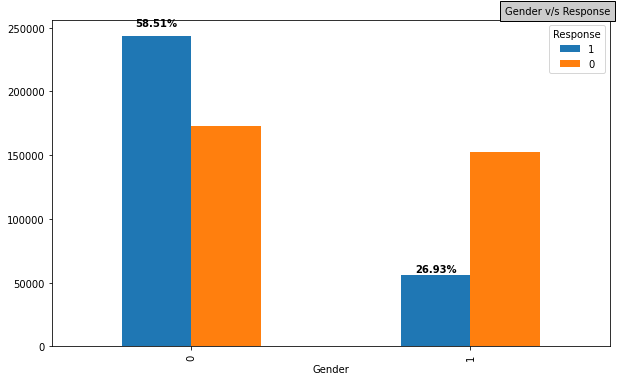

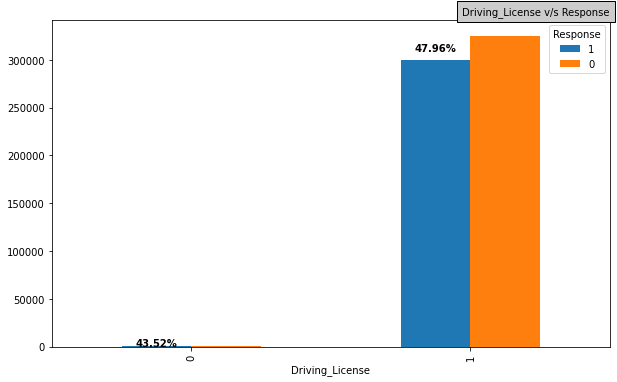

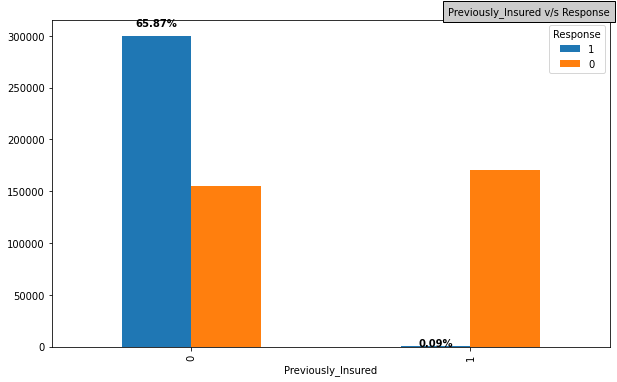

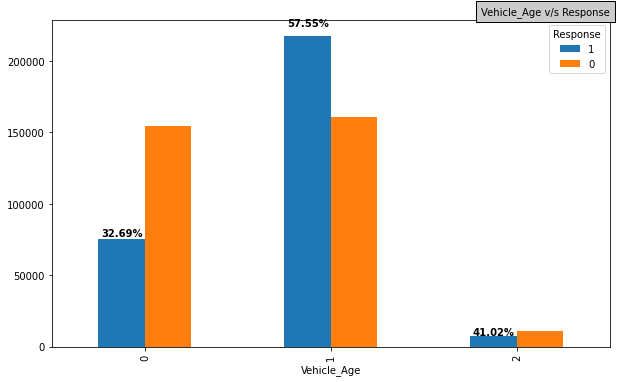

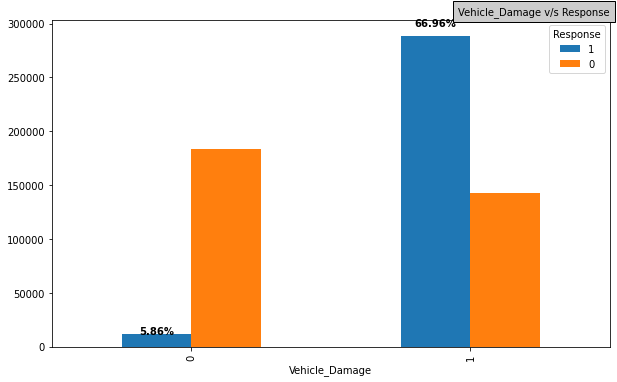

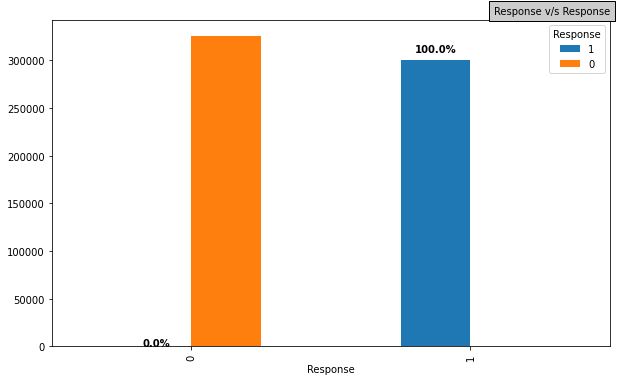

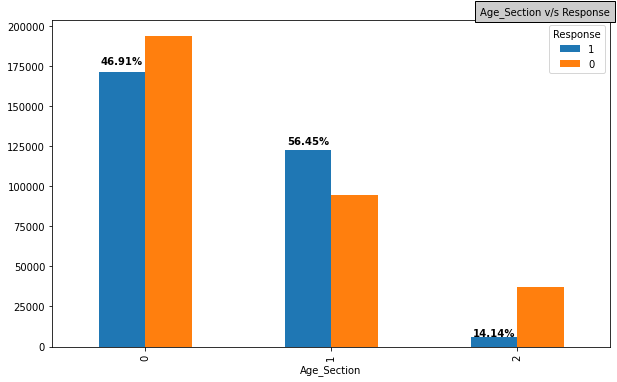

In [ ]:
for i in categorical_features:
  plot_bar_compare(insurance,i,"Response")

- Females less prefer taking a vehicle insurance, so we must focus on increaing the number of positive reponses by  females
- Persons not having a driving license have a lower probability to take vehical inurance
- The persons who are previously insured have very less chances of taking insurance again, so must improve our policy so that the peoples having insurance in advance must also prefer to take our vehicle insurance policy.
- People whose vehicle age is btween 1-2years have a higher probability to take vehicle insurance, also we note that there are good number of customers with vehicle of age less than 1 year but only 32.69% of them prefer to take vehicle insurance, so our terms and conditions must be such that those people also prefer to take insurance
- If the customer's vehicle s damaged then there is a higher chance that he/she will take vehicle insurance.

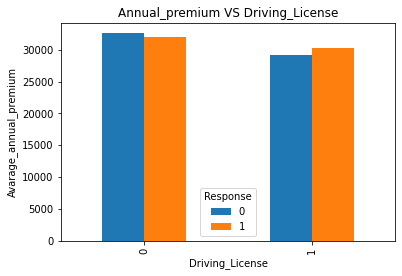

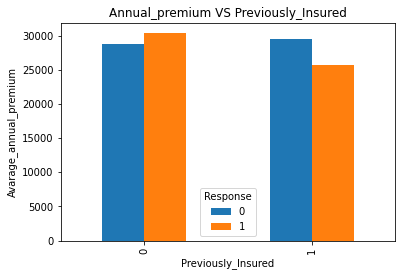

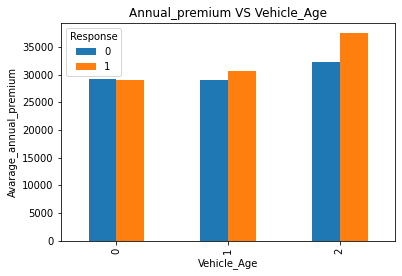

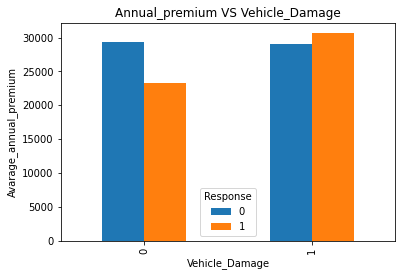

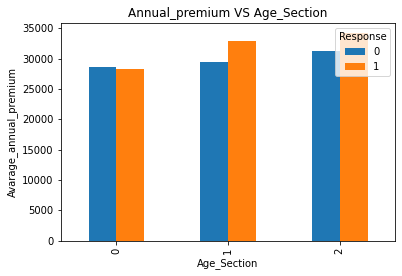

In [ ]:
# to have a look at how average annual premium is affected by different categories of different categorical attributes
for i in categorical_features:
  if i not in ['Gender','Response']:
    insurance.groupby([i,'Response'])['Annual_Premium'].mean().unstack().plot(kind = 'bar')
    plt.ylabel('Avarage_annual_premium')
    plt.title('Annual_premium'+' VS '+ i)

In [ ]:
#now distrribution of continuous features and how they affect the dependent column
continuous_features

['Annual_Premium', 'Region_Response', 'Channel_Response']

In [ ]:
insurance.shape

(625634, 10)

In [ ]:
insurance["Annual_Premium"].value_counts()

2630.000000     114531
39008.000000        41
45179.000000        38
38287.000000        38
30117.000000        36
                 ...  
36697.295229         1
32618.153259         1
25564.548119         1
24552.091764         1
38287.201466         1
Name: Annual_Premium, Length: 246653, dtype: int64

In [ ]:
premium_response=(pd.crosstab(insurance["Annual_Premium"],insurance["Response"])).sort_values(by=1,ascending=False)#.plot(kind="line",rot=45)
premium_response

Response,0,1
Annual_Premium,,
2630.0,56372,58159
40088.0,18,13
45179.0,27,11
37674.0,7,11
27930.0,18,10
...,...,...
41022.0,3,0
23671.0,8,0
52231.0,2,0


From here we note that most of the comapanies have a mimum annual premium of 2630, so this annual premium is common to occur, so analysing other annual premiums

In [ ]:
insurance_highpremium=insurance[insurance["Annual_Premium"]!=2630]   
# we have did this because very high number of rows have 2630 annual premum, so we are not able to make proper analysis

In [ ]:
insurance_lowpremium = insurance[insurance['Annual_Premium'] == 2630]

This is to show how probability of resposne to be 0 and 1 varies with variation in continuous variables

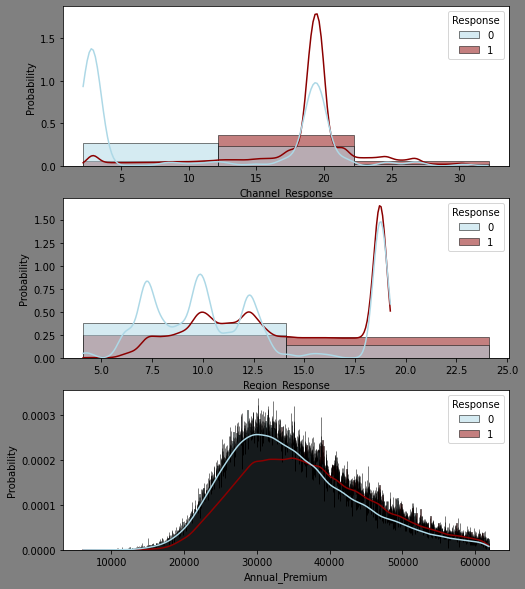

In [ ]:
fig,axs=plt.subplots(3,1,figsize=(8,10),facecolor='grey',edgecolor='orange')
sns.histplot(data=insurance,x="Channel_Response",stat="probability",binwidth=10,ax=axs[0],hue="Response",kde=True,linewidth=0.5,palette=['lightblue','darkred'])
sns.histplot(data=insurance,x="Region_Response",stat="probability",binwidth=10,ax=axs[1],hue="Response",kde=True,linewidth=0.5,palette=['lightblue','darkred'])
sns.histplot(data=insurance_highpremium,x="Annual_Premium",stat="probability",binwidth=10,ax=axs[2],hue="Response",kde=True,linewidth=0.5,palette=['lightblue','darkred'])

Here from last graph we note that as the value for annual premium goes higher, the number of peoples opting for that insurance have higher chances as compared to those not opting for vehicle insurance

This is to show how annual premium varies with variation in categoricalvariables

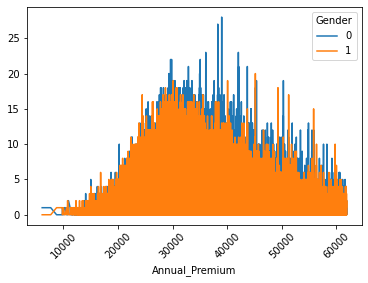

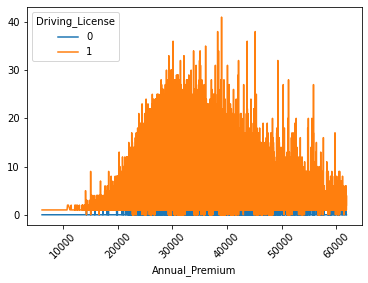

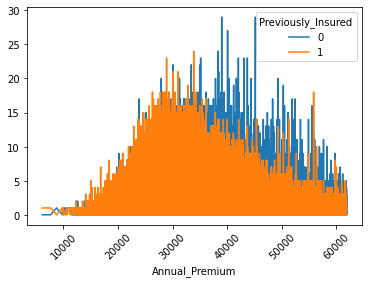

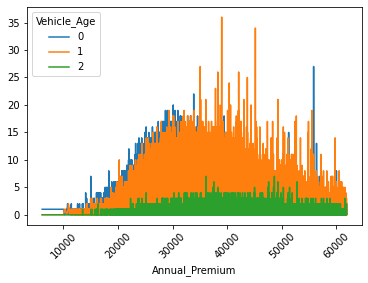

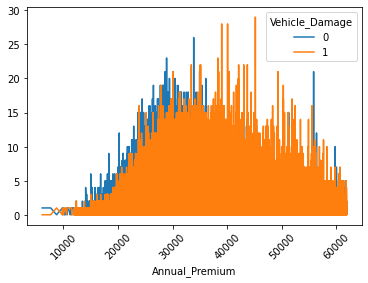

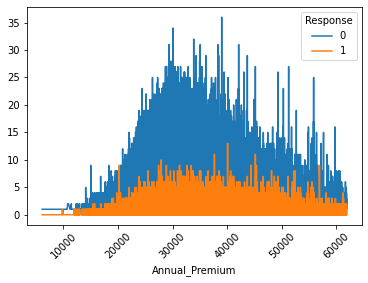

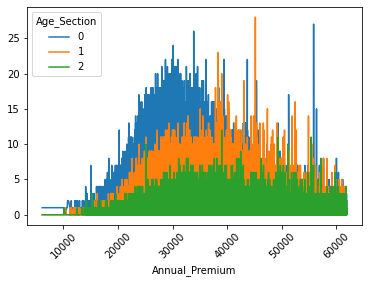

In [ ]:
for c in categorical_features:
  (pd.crosstab(insurance_highpremium["Annual_Premium"],insurance_highpremium[c])).plot(kind="line",rot=45)
  plt.show()

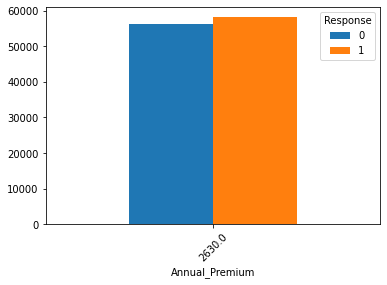

In [ ]:
#for the lowest premium of 2630Rs there are slightly higher chances of taking that inurance
(pd.crosstab(insurance_lowpremium["Annual_Premium"],insurance_lowpremium['Response'])).plot(kind="bar",rot=45)

###Multivariate Analysis

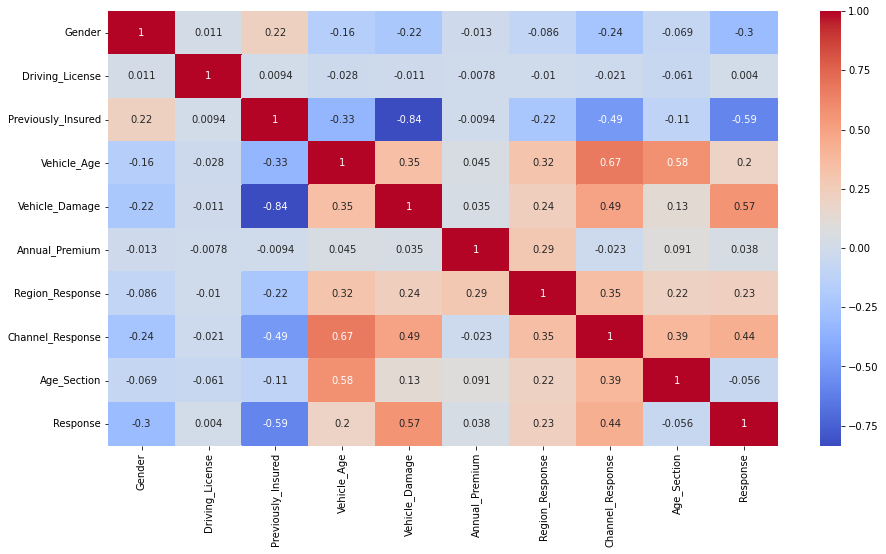

In [ ]:
plt.figure(figsize=(15,8))
correlation = insurance.corr()
sns.heatmap((correlation), annot=True, cmap='coolwarm')

In [ ]:
#remove multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
  vif = pd.DataFrame()
  vif['columns'] = x.columns
  vif['vif_values'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

  return vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#vif values are not very much high also tree models are not affected by multicollinarity
calc_vif(insurance[[col for col in insurance.columns if col not in ['Response']]])

,columns,vif_values
0,Gender,1.620300
1,Driving_License,25.608177
2,Previously_Insured,4.602400
3,Vehicle_Age,6.087501
4,Vehicle_Damage,10.805858
5,Annual_Premium,5.374770
6,Region_Response,12.564923
7,Channel_Response,10.246459
8,Age_Section,2.485625


##Model Building

###Basic requirement include:
- independent and dependent variable
- a function which shows how a model is working on the basis of three matrics that are accuracy, auc_roc score and cofusion matrix
- separate train and test data


In [ ]:
#now we are only left with variables that are important for us so we will take all of them in our model, in order of their correlation with dependent attribute


In [ ]:
corr_class=abs((insurance.corr())["Response"]).sort_values(ascending=False)
independent_var=(corr_class.index)[2:]
dependent_var=["Response"]

In [ ]:
def model_checking(original,predicted,labels=["possibility1","possibility2"]):
  from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
  model_accuracy=accuracy_score(predicted,original)
  print("The accuracy of model is= ", model_accuracy,"\n")
  rocauc_score=roc_auc_score(original,predicted)
  print("The roc_auc score of model is= ", rocauc_score,"\n")
  print("Confusion matrix: \n")
  cm=confusion_matrix(original,predicted)
  print(cm)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

In [ ]:
from sklearn.model_selection import train_test_split
x=insurance[independent_var].copy()  #independent features
y=insurance["Response"].copy()       #dependent features
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
x_train.shape

(500507, 8)

In [ ]:
x_test.shape

(125127, 8)

In [ ]:
x_train

,Vehicle_Damage,Channel_Response,Gender,Region_Response,Vehicle_Age,Age_Section,Annual_Premium,Driving_License
187856,1,2.190000,0,7.39,0,0,2630.000000,1
336034,0,2.880000,0,6.97,0,0,33237.000000,1
341130,0,2.190000,1,9.71,0,0,44878.000000,1
181520,0,2.880000,1,7.39,0,0,26205.000000,1
305055,0,21.510000,1,7.46,1,1,46748.000000,1
...,...,...,...,...,...,...,...,...
359783,1,18.970000,0,12.16,1,1,28778.000000,1
152315,0,2.880000,1,6.97,0,0,26285.000000,1
117952,1,18.970000,0,8.02,1,0,32700.000000,1
435829,1,14.128409,0,6.27,1,1,36047.248705,1


###Logistic regression (logistic)

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(fit_intercept=True, max_iter=10000)
logistic.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
train_predict=logistic.predict_proba(x_train)[:,1]
test_predict=logistic.predict_proba(x_test)[:,1]

In [ ]:
train_predicted=logistic.predict(x_train)
test_predicted=logistic.predict(x_test)

The accuracy of model is=  0.7898710707342754 

The roc_auc score of model is=  0.7921983783661857 

Confusion matrix: 

[[191090  69197]
 [ 35974 204246]]


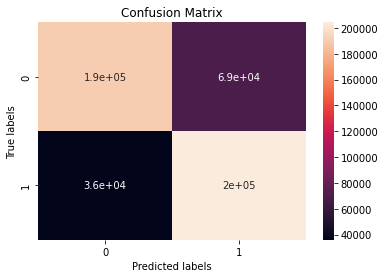

In [ ]:
model_checking(y_train, train_predicted,labels=["0","1"])

The accuracy of model is=  0.7894539148225403 

The roc_auc score of model is=  0.7921355224408894 

Confusion matrix: 

[[47825 17522]
 [ 8823 50957]]


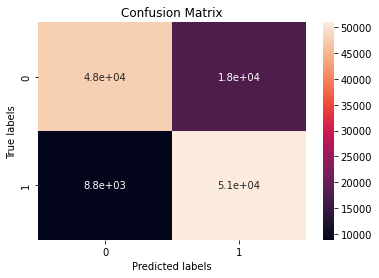

In [ ]:
model_checking(y_test, test_predicted,labels=["0","1"])

###Decesion Tree

Simple Model (dtree)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#fitting on train data
dtree=DecisionTreeClassifier(criterion="entropy",random_state=0)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
test_predicted=dtree.predict(x_test)
train_predicted=dtree.predict(x_train)

The accuracy of model is=  0.9844277902207162 

The roc_auc score of model is=  0.9838537539291441 

Confusion matrix: 

[[259811    476]
 [  7318 232902]]


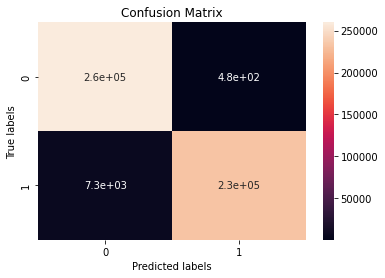

In [ ]:
model_checking(y_train, train_predicted,labels=["0","1"])

The accuracy of model is=  0.8829269462226378 

The roc_auc score of model is=  0.8820459802817174 

Confusion matrix: 

[[58933  6414]
 [ 8235 51545]]


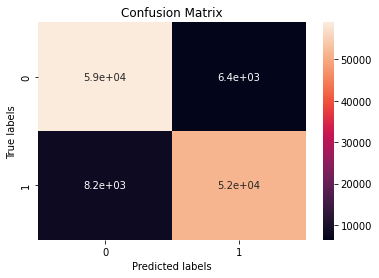

In [ ]:
model_checking(y_test, test_predicted,labels=["0","1"])

Hyperparameter tuning on Decision tree(tuned_dt)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_values = {'max_depth':[8,9], 'min_samples_leaf':[2,4],'min_samples_split':[10,20],'max_leaf_nodes':[50,70]}
tuned_dt = GridSearchCV(dtree, param_grid = grid_values, scoring = 'roc_auc', cv=5)
tuned_dt.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'max_depth': [8, 9], 'max_leaf_nodes': [50, 70],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [10, 20]},
             scoring='roc_auc')

In [ ]:
print("Best: %f using %s" % (tuned_dt.best_score_, tuned_dt.best_params_))

Best: 0.931553 using {'max_depth': 9, 'max_leaf_nodes': 70, 'min_samples_leaf': 2, 'min_samples_split': 10}


###Gradient boosting

In [ ]:
#gradient boosting
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)


GradientBoostingClassifier()

Hyperparameter tuning on Gradient boosting

In [ ]:
grid_values = {'n_estimators':[50, 80], 'max_depth':[6, 8]}
gbct = GridSearchCV(gbc, param_grid = grid_values, scoring = 'roc_auc', cv=3)
gbct.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [6, 8], 'n_estimators': [50, 80]},
             scoring='roc_auc')

In [ ]:
print("Best: %f using %s" % (gbct.best_score_, gbct.best_params_))

Best: 0.970065 using {'max_depth': 8, 'n_estimators': 80}


In [ ]:
test_predicted=gbct.predict(x_test)
train_predicted=gbct.predict(x_train)

The accuracy of model is=  0.9024609046426924 

The roc_auc score of model is=  0.9011081265694713 

Confusion matrix: 

[[243329  16958]
 [ 31861 208359]]


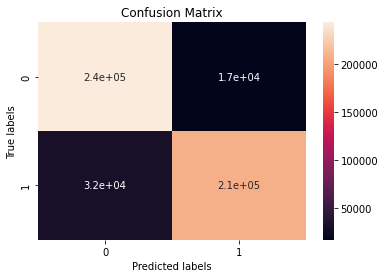

In [ ]:
model_checking(y_train, train_predicted,labels=["0","1"])

The accuracy of model is=  0.870851215165392 

The roc_auc score of model is=  0.871757933403806 

Confusion matrix: 

[[55635  9712]
 [ 6448 53332]]


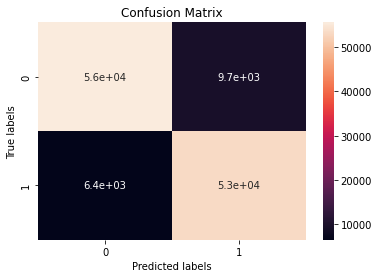

In [ ]:
model_checking(y_test, test_predicted,labels=["0","1"])

###XGBClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(x_train,y_train)

XGBClassifier()

The accuracy of model is=  0.8651467412044187 

The roc_auc score of model is=  0.8660945425779224 

Confusion matrix: 

[[219280  41007]
 [ 26488 213732]]


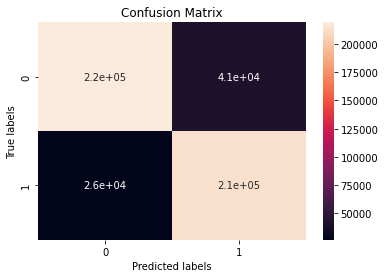

In [ ]:
xgb_train_pred = XGB_model.predict(x_train)
model_checking(y_train, xgb_train_pred,labels=["0","1"])

The accuracy of model is=  0.8673747472567871 

The roc_auc score of model is=  0.8684245602303144 

Confusion matrix: 

[[55207 10140]
 [ 6455 53325]]


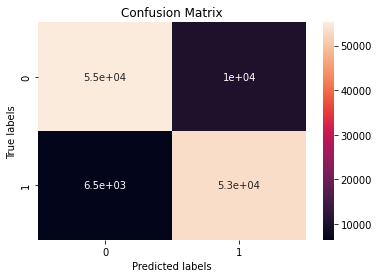

In [ ]:
xgb_test_pred = XGB_model.predict(x_test)
model_checking(y_test, xgb_test_pred,labels=["0","1"])

In [ ]:
features = x_train.columns
importances = XGB_model.feature_importances_
indices = np.argsort(importances)

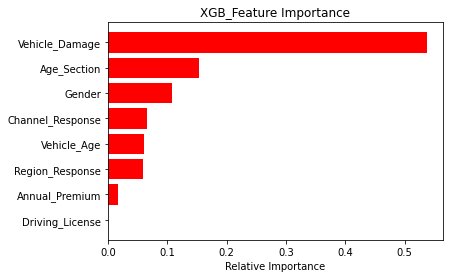

In [ ]:
plt.title('XGB_Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

Here we can have a look at the factors which affect the person's response orderwise.

Vehicle damage highly increases the probability of the response to be 1
Age_section is another feature which effectively affects the reponse

Annual Premium do not very much affect the response feature.

Also ressponse do not much depend on whether a person have drivng liscence or not.

hyperparmeter tuning on XGB

In [ ]:
learning_rate = [0.5,1]
subsample = [0.9,1.2]
max_depth = [5,7]
grid = dict(learning_rate=learning_rate, subsample=subsample, max_depth=max_depth)
xgb_tuned = GridSearchCV(XGB_model,param_grid = grid,scoring = 'roc_auc', cv = 3)
xgb_tuned.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 

GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.5, 1], 'max_depth': [5, 7],
                         'subsample': [0.9, 1.2]},
             scoring='roc_auc')

In [ ]:
print("Best: %f using %s" % (xgb_tuned.best_score_, xgb_tuned.best_params_))

Best: 0.972338 using {'learning_rate': 0.5, 'max_depth': 5, 'subsample': 0.9}


The accuracy of model is=  0.9104647887042538 

The roc_auc score of model is=  0.9084276601280225 

Confusion matrix: 

[[249677  10610]
 [ 34203 206017]]


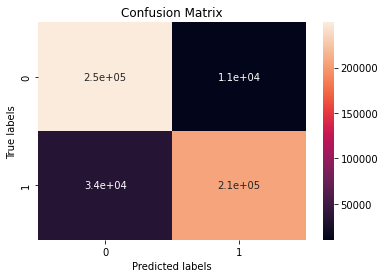

In [ ]:
xgb_tuned_train_pred = xgb_tuned.predict(x_train)
model_checking(y_train, xgb_tuned_train_pred,labels=["0","1"])

The accuracy of model is=  0.9097157288195193 

The roc_auc score of model is=  0.9074685135738013 

Confusion matrix: 

[[62601  2746]
 [ 8551 51229]]


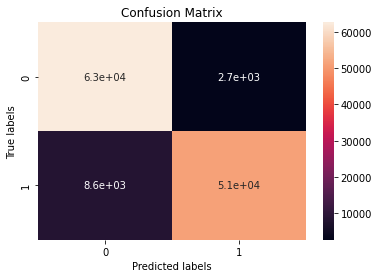

In [ ]:
xgb_tuned_test_pred = xgb_tuned.predict(x_test)
model_checking(y_test, xgb_tuned_test_pred,labels=["0","1"])

### Random_forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
RF_train_pred = RF.predict(x_train)
model_checking(y_train, RF_train_pred,labels=["0","1"])

In [ ]:
RF_test_pred = RF.predict(x_test)
model_checking(y_test, RF_test_pred,labels=["0","1"])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,RF_train_pred))
print("\n")
print(classification_report(y_test,RF_test_pred))

HyperParameter Tuning on RandomForest

In [ ]:
grid_value = {'max_depth':[5,6],'min_samples_split':[10,20]}
RF_tuned = GridSearchCV(RF,grid_value, scoring = 'roc_auc', cv = 3)
RF_tuned.fit(x_train,y_train)

In [ ]:
print("Best: %f using %s" % (RF_tuned.best_score_, RF_tuned.best_params_))

Best: 0.923149 using {'max_depth': 6, 'min_samples_split': 10}


In [ ]:
RF_tune_train_pred = RF_tuned.predict(x_train)
model_checking(y_train, RF_tune_train_pred,labels=["0","1"])

In [ ]:
RF_tune_test_pred = RF_tuned.predict(x_test)
model_checking(y_test, RF_tune_test_pred,labels=["0","1"])

In [ ]:
features = x_train.columns
importances = RF.feature_importances_
indices = np.argsort(importances)

In [ ]:
plt.title('Randomforest_Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

###Final Observation And Model Selection

In [ ]:
from sklearn.svm import SVC #Support vector classifier
model = SVC(kernel='linear', C=1E10)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [ ]:
def make_table(method,xtrain,ytrain,xtest,ytest):
  cols = ['Model','Train_accuracy', 'Test_accuarcy','Train_precision','Test_precision','Train_recall','Test_recall','Train_f1','Test_f1','Train_roc_auc','Test_roc_auc']
  table = pd.DataFrame()
  method_list = list(method.keys())
  i=0
  for model in method_list:
    method[model].fit(xtrain,ytrain)
    Train_pred = method[model].predict(xtrain)
    Test_pred = method[model].predict(xtest)

    table.loc[i,'Model'] = method_list[i]
    table.loc[i,'Train_accuracy'] = accuracy_score(ytrain,Train_pred)
    table.loc[i,'Test_accuracy'] = accuracy_score(ytest,Test_pred)
    table.loc[i,'Train_precision'] = precision_score(Train_pred,ytrain)
    table.loc[i,'Test_precision'] = precision_score(Test_pred,ytest)
    table.loc[i,'Train_recall'] = recall_score(Train_pred,ytrain)
    table.loc[i,'Test_recall'] = recall_score(Test_pred,ytest)
    table.loc[i,'Train_f1'] = f1_score(Train_pred,ytrain)
    table.loc[i,'Test_f1'] = f1_score(Test_pred,ytest)
    table.loc[i,'Train_roc_auc'] = roc_auc_score(Train_pred,ytrain)
    table.loc[i,'Test_roc_auc'] = roc_auc_score(Test_pred,ytest)


    cm=confusion_matrix(y_train,Train_pred)

    cm_t=confusion_matrix(y_test,Test_pred)
    # print("The confusion_matrix of " f'{method_list[i]}' '\n' f'{cm}')
    print("The confusion_matrix of " f'{method_list[i]}' '\n' f'{cm_t}')
    

    i = i+1

  return table

In [ ]:
#Before hyperparameter tunning

method = {'LogisticRegression': logistic, 'Desicion_tree':dtree,'Gradient_boosting':gbc,'XGBClassifer':XGB_model,'RandomForest':RF}

In [ ]:
make_table(method,x_train,y_train,x_test,y_test)

The confusion_matrix of LogisticRegression
[[47825 17522]
 [ 8823 50957]]
The confusion_matrix of Desicion_tree
[[58933  6414]
 [ 8235 51545]]
The confusion_matrix of Gradient_boosting
[[55635  9712]
 [ 6448 53332]]
The confusion_matrix of XGBClassifer
[[55207 10140]
 [ 6455 53325]]
The confusion_matrix of RandomForest
[[59013  6334]
 [ 8286 51494]]


,Model,Train_accuracy,Test_accuracy,Train_precision,Test_precision,Train_recall,Test_recall,Train_f1,Test_f1,Train_roc_auc,Test_roc_auc
0,LogisticRegression,0.789871,0.789454,0.850246,0.852409,0.746942,0.744126,0.795253,0.794595,0.794255,0.794187
1,Desicion_tree,0.984428,0.882927,0.969536,0.862245,0.997960,0.889336,0.983543,0.875581,0.985283,0.883366
2,Gradient_boosting,0.868108,0.870851,0.889060,0.892138,0.844374,0.845949,0.866141,0.868430,0.868365,0.871044
3,XGBClassifer,0.865147,0.867375,0.889734,0.892021,0.839023,0.840227,0.863635,0.865350,0.865624,0.867772
4,RandomForest,0.984368,0.883159,0.971705,0.861392,0.995620,0.890468,0.983517,0.875689,0.985036,0.883673


In [ ]:
tuned_method = {'Desicion_tree':tuned_dt,'Gradient_boosting':gbct,'XGBClassifer':xgb_tuned,'RandomForest':RF_tuned}

In [ ]:
#after hyperparameter tuning
make_table(tuned_method,x_train,y_train,x_test,y_test)

The confusion_matrix of Desicion_tree
[[53422 11925]
 [ 7152 52628]]
The confusion_matrix of Gradient_boosting
[[61040  4307]
 [ 7986 51794]]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 

The confusion_matrix of XGBClassifer
[[62601  2746]
 [ 8551 51229]]
The confusion_matrix of RandomForest
[[49156 16191]
 [ 4333 55447]]


,Model,Train_accuracy,Test_accuracy,Train_precision,Test_precision,Train_recall,Test_recall,Train_f1,Test_f1,Train_roc_auc,Test_roc_auc
0,Desicion_tree,0.845621,0.847539,0.878249,0.880361,0.814586,0.815268,0.845221,0.846565,0.846744,0.848599
1,Gradient_boosting,0.902461,0.901756,0.867367,0.866410,0.924737,0.923228,0.895134,0.893917,0.904479,0.903766
2,XGBClassifer,0.910465,0.909716,0.857618,0.856959,0.951022,0.949125,0.901908,0.900690,0.915269,0.914473
3,RandomForest,0.834286,0.835975,0.924944,0.927518,0.773909,0.773989,0.842713,0.843827,0.844711,0.846491


XGboost classifier is giving the best results so we select this model for further predictions, and to know whether a customer response for vehicle insurance will be 1 or 0

## Conclusion